<a href="https://colab.research.google.com/github/Swastik26/ProductSalesAnalyzer/blob/main/Product_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1.1.1: Import Necessary Libraries and Load the Dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'dataset.csv' with the actual file path
data = pd.read_csv('/content/Order_details(masked).csv')

# Display  the dataset to understand its structure
print(data)


           Name                      Email  \
0      PERSON_1         PERSON_1@gmail.com   
1      PERSON_2  PERSON_2@tataprojects.com   
2      PERSON_3         PERSON_3@gmail.com   
3      PERSON_4         PERSON_4@gmail.com   
4      PERSON_5         PERSON_5@gmail.com   
..          ...                        ...   
576  PERSON_522       PERSON_522@gmail.com   
577  PERSON_523       PERSON_523@gmail.com   
578  PERSON_523       PERSON_523@gmail.com   
579  PERSON_524       PERSON_524@gmail.com   
580  PERSON_525       PERSON_525@gmail.com   

                                               Product     Transaction Date  
0                                           PRODUCT_75  01/03/2021 00:47:26  
1                                           PRODUCT_75  01/03/2021 02:04:07  
2                                           PRODUCT_63  01/03/2021 09:10:43  
3                                           PRODUCT_63  01/03/2021 09:49:48  
4          PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89  0

In [ ]:
#1.1.2: Display the first few rows of the dataset to understand its structure
print(data.head())

       Name                      Email  \
0  PERSON_1         PERSON_1@gmail.com   
1  PERSON_2  PERSON_2@tataprojects.com   
2  PERSON_3         PERSON_3@gmail.com   
3  PERSON_4         PERSON_4@gmail.com   
4  PERSON_5         PERSON_5@gmail.com   

                                       Product     Transaction Date  
0                                   PRODUCT_75  01/03/2021 00:47:26  
1                                   PRODUCT_75  01/03/2021 02:04:07  
2                                   PRODUCT_63  01/03/2021 09:10:43  
3                                   PRODUCT_63  01/03/2021 09:49:48  
4  PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89  01/03/2021 10:56:46  


In [ ]:
#Step 1.2: Extract Hourly Information from Transaction Date
# Convert 'Transaction Date' to datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Extract hour from the 'Transaction Date'
data['Hour'] = data['Transaction Date'].dt.hour

# Display unique hours to verify the operation
print(data['Hour'].unique())


[ 0  2  9 10 11 12 13 14 15 17 18 19 20 22 23  1  8 16  3  6 21  5  7]


In [ ]:
#Step 1.3: Group Data by Hour
#Aggregate the data by the hour to calculate the number of transactions.
# Group data by hour and count the number of transactions
hourly_transactions = data.groupby('Hour').size()

# Display the grouped data
print(hourly_transactions)


Hour
0     17
1      4
2      3
3      1
5      3
6      2
7      6
8     10
9     14
10    24
11    37
12    51
13    33
14    28
15    41
16    29
17    27
18    33
19    42
20    39
21    41
22    45
23    51
dtype: int64


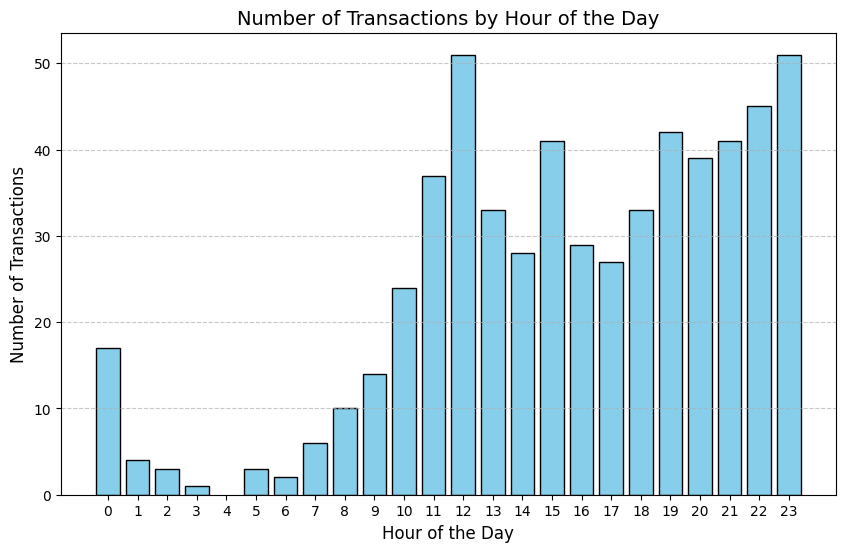

In [ ]:
#Step 1.4: Visualize the Data
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(hourly_transactions.index, hourly_transactions.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Number of Transactions by Hour of the Day', fontsize=14)
plt.xticks(range(0, 24))  # Ensure all hours are shown on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
# Step 2.1: Convert Transaction Date to DateTime and extract the hour

# Ensure 'Transaction Date' is in datetime format
data['Time'] = pd.to_datetime(data['Transaction Date'])

# Extract the hour from the 'Time' column
data['Hour'] = data['Time'].dt.hour

# Display the updated DataFrame
print(data[['Transaction Date', 'Time', 'Hour']].head())


     Transaction Date                Time  Hour
0 2021-01-03 00:47:26 2021-01-03 00:47:26     0
1 2021-01-03 02:04:07 2021-01-03 02:04:07     2
2 2021-01-03 09:10:43 2021-01-03 09:10:43     9
3 2021-01-03 09:49:48 2021-01-03 09:49:48     9
4 2021-01-03 10:56:46 2021-01-03 10:56:46    10


In [ ]:
# Step 2.2: Customize the DateTime format for display purposes
data['Formatted Time'] = data['Time'].dt.strftime('%d-%m-%Y %H:%M:%S')

# Display the formatted Time column
print(data[['Transaction Date', 'Formatted Time']].head())


     Transaction Date       Formatted Time
0 2021-01-03 00:47:26  03-01-2021 00:47:26
1 2021-01-03 02:04:07  03-01-2021 02:04:07
2 2021-01-03 09:10:43  03-01-2021 09:10:43
3 2021-01-03 09:49:48  03-01-2021 09:49:48
4 2021-01-03 10:56:46  03-01-2021 10:56:46


In [ ]:
# Step 3: Find the 'n' busiest hours

n = 5  # Number of busiest hours to find

# Calculate the frequency of each hour
hour_frequencies = data['Hour'].value_counts()

# Get the top 'n' busiest hours
top_n_hours = hour_frequencies.head(n)

# Convert to lists
busiest_hours = top_n_hours.index.tolist()  # List of busiest hours (e.g., [14, 10, 15, ...])
transaction_counts = top_n_hours.values.tolist()  # List of transaction counts for those hours

# Display the results
print(f"Busiest Hours: {busiest_hours}")
print(f"Transaction Counts: {transaction_counts}")


Busiest Hours: [23, 12, 22, 19, 21]
Transaction Counts: [51, 51, 45, 42, 41]


In [ ]:
# Step 4.1: Stack indices and frequencies

# Combine hours and their frequencies
final_result = list(zip(busiest_hours, transaction_counts))

# Optionally, create a DataFrame for better representation
import pandas as pd
result_df = pd.DataFrame(final_result, columns=['Hour', 'Frequency'])

# Display the final result
print("List of Tuples:")
print(final_result)

print("\nDataFrame:")
print(result_df)


List of Tuples:
[(23, 51), (12, 51), (22, 45), (19, 42), (21, 41)]

DataFrame:
   Hour  Frequency
0    23         51
1    12         51
2    22         45
3    19         42
4    21         41


In [ ]:
# Step 4.2 :Save the DataFrame to a CSV file
result_df.to_csv('busiest_hours.csv', index=False)


In [ ]:
# Step 5 : Tasks to Customize Hourly Frequencies
# Sort the hours in ascending order (for continuous visualizations like line plots)
sorted_result = sorted(final_result, key=lambda x: x[0])  # Sort by hour (index 0)

# Normalize frequencies to percentages
total_transactions = sum(transaction_counts)
normalized_result = [(hour, freq / total_transactions * 100) for hour, freq in final_result]

# Ensure all 24 hours are represented
all_hours = list(range(24))  # List of all hours
hourly_freq_dict = dict(final_result)  # Convert to a dictionary for easy lookup
complete_result = [(hour, hourly_freq_dict.get(hour, 0)) for hour in all_hours]

# Display the prepared results
print("Sorted Result:")
print(sorted_result)

print("\nNormalized Result (as percentages):")
print(normalized_result)

print("\nComplete Result (all hours included):")
print(complete_result)


Sorted Result:
[(12, 51), (19, 42), (21, 41), (22, 45), (23, 51)]

Normalized Result (as percentages):
[(23, 22.17391304347826), (12, 22.17391304347826), (22, 19.565217391304348), (19, 18.26086956521739), (21, 17.82608695652174)]

Complete Result (all hours included):
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 51), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 42), (20, 0), (21, 41), (22, 45), (23, 51)]


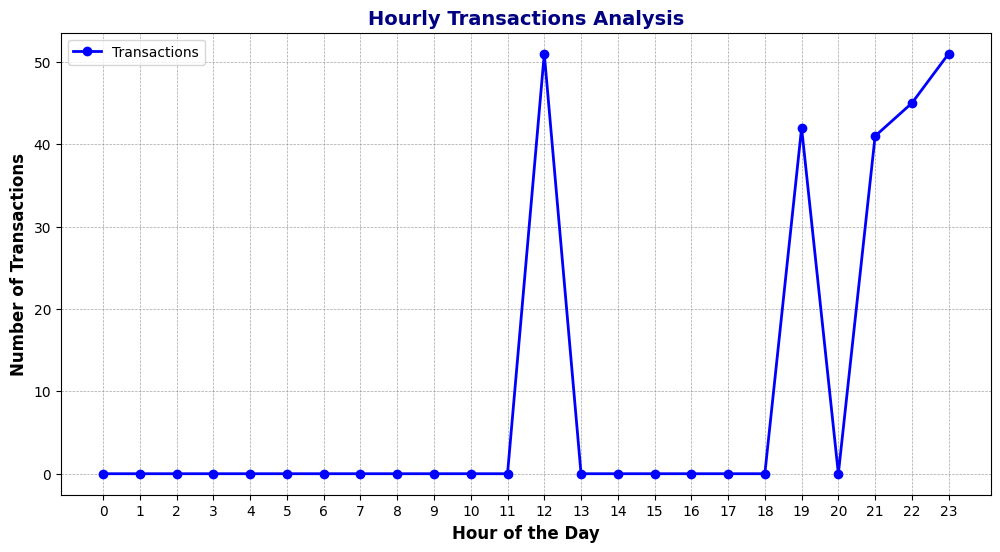

In [ ]:
#Step 6: Visualization with Matplotlib
import matplotlib.pyplot as plt

# Prepare data for plotting
hours = [hour for hour, _ in complete_result]  # Extract all hours (0–23)
frequencies = [freq for _, freq in complete_result]  # Extract corresponding frequencies

# Create the plot
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(hours, frequencies, marker='o', color='b', linestyle='-', linewidth=2, markersize=6, label='Transactions')

# Add labels, title, and legend
plt.xlabel('Hour of the Day', fontsize=12, fontweight='bold')
plt.ylabel('Number of Transactions', fontsize=12, fontweight='bold')
plt.title('Hourly Transactions Analysis', fontsize=14, fontweight='bold', color='navy')
plt.xticks(hours, fontsize=10)  # Set x-axis tick labels
plt.yticks(fontsize=10)  # Set y-axis tick labels
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add gridlines
plt.legend(fontsize=10)  # Add legend

# Save or show the plot
plt.savefig('hourly_transactions_analysis.png')  # Save the plot as a file
plt.show()  # Display the plot


In [ ]:
# Modify color and linestyle for additional visual appeal.
import seaborn as sns
sns.set_theme(style="whitegrid")



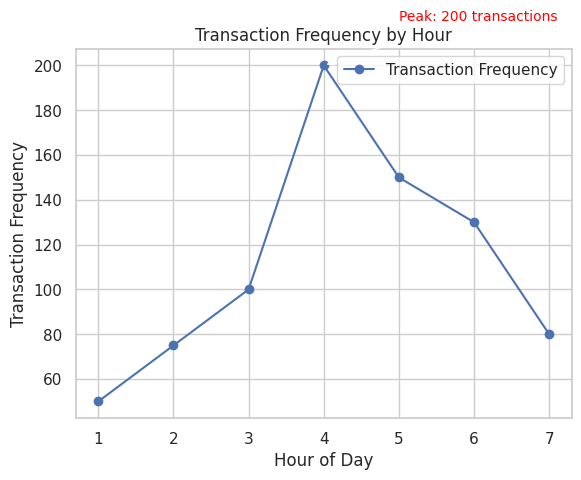

In [ ]:
#Step : 7.1 Identify Peak Hours
# Find peak hour and frequency
import matplotlib.pyplot as plt

# Assuming complete_result is a list of tuples: [(hour, frequency), ...]
# Example data
complete_result = [(1, 50), (2, 75), (3, 100), (4, 200), (5, 150), (6, 130), (7, 80)]

# Find peak hour and frequency
peak_hour = max(complete_result, key=lambda x: x[1])
peak_hour_value, peak_frequency = peak_hour

# Plot the data (using hours as x-axis and frequencies as y-axis)
hours = [hour for hour, _ in complete_result]
frequencies = [freq for _, freq in complete_result]

plt.plot(hours, frequencies, marker='o', color='b', label='Transaction Frequency')
plt.title('Transaction Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Frequency')

# Annotate the peak point
plt.annotate(f'Peak: {peak_frequency} transactions',
             xy=(peak_hour_value, peak_frequency),
             xytext=(peak_hour_value + 1, peak_frequency + 20),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10, color='red')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()



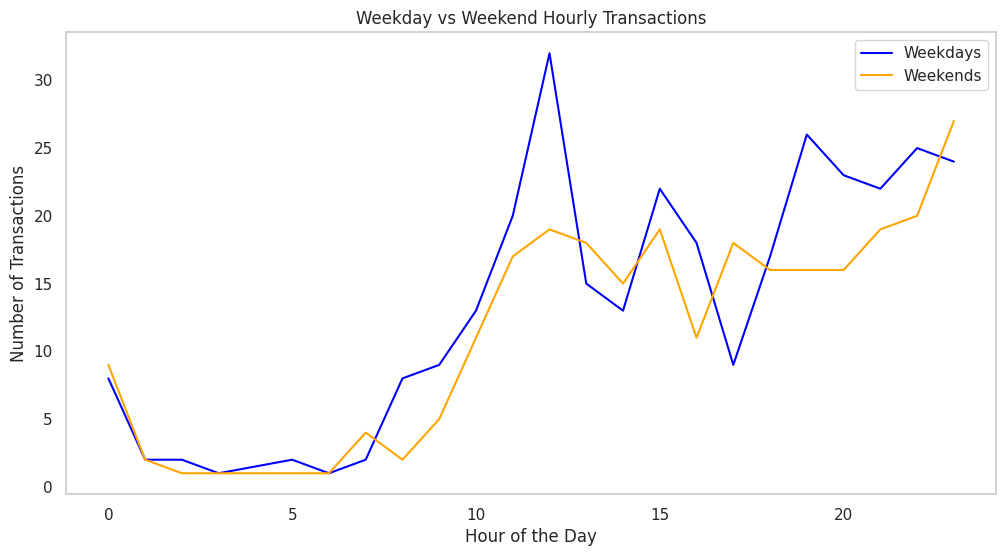

In [ ]:
#Step-7.2. Compare Weekday vs. Weekend Transactions
# Group data by weekday and weekend
data['DayOfWeek'] = data['Transaction Date'].dt.day_name()
weekday_data = data[data['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekend_data = data[data['DayOfWeek'].isin(['Saturday', 'Sunday'])]

# Aggregate and visualize
weekday_hours = weekday_data['Hour'].value_counts().sort_index()
weekend_hours = weekend_data['Hour'].value_counts().sort_index()

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(weekday_hours.index, weekday_hours.values, label='Weekdays', color='blue')
plt.plot(weekend_hours.index, weekend_hours.values, label='Weekends', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Weekday vs Weekend Hourly Transactions')
plt.legend()
plt.grid()
plt.show()


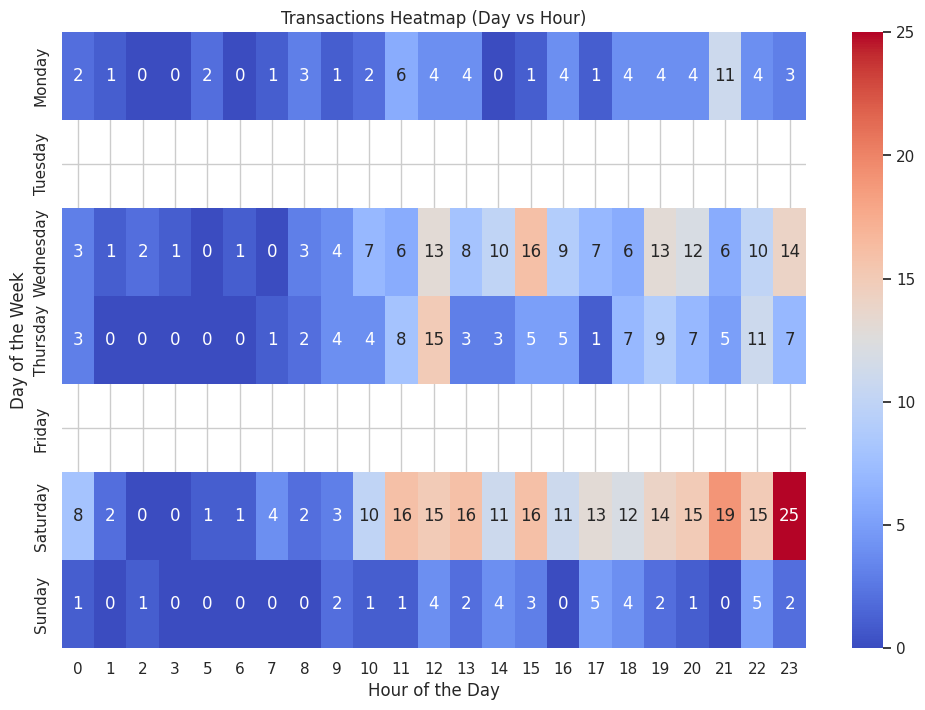

In [ ]:
#Step-7.3. Visualize Data as a Heatmap
import seaborn as sns
import numpy as np

# Prepare pivot table for heatmap
heatmap_data = data.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")  # Change 'd' to '.0f'
plt.title('Transactions Heatmap (Day vs Hour)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


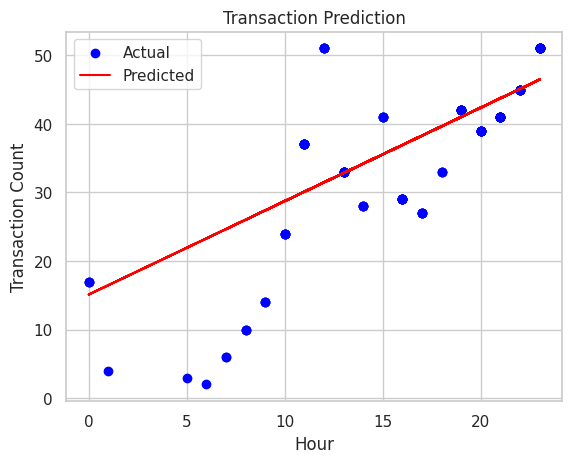

In [ ]:
#Step-7.4. Predictive Analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare features and target
X = data['Hour'].values.reshape(-1, 1)  # Feature: Hour of the day

# Calculate the frequency of transactions for each hour
transaction_counts = data.groupby('Hour').size()

# Create a new column 'Transaction Count' in the DataFrame
data['Transaction Count'] = data['Hour'].map(transaction_counts)

# Now assign the 'Transaction Count' column to y
y = data['Transaction Count']  # Target: Frequency of transactions

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and visualize
predicted = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predicted, color='red', label='Predicted')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.title('Transaction Prediction')
plt.legend()
plt.show()


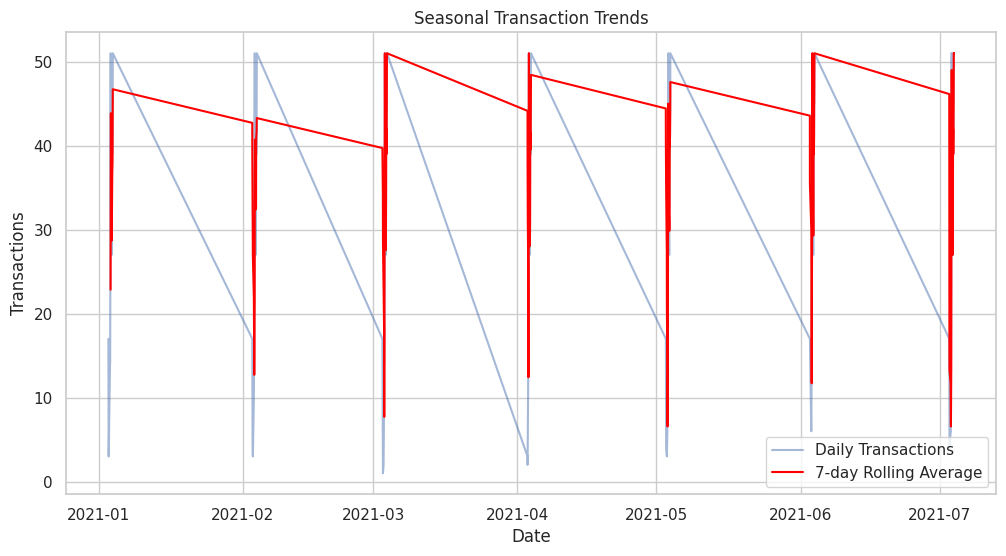

In [ ]:
#Step-7.5. Analyze Seasonal Trends
# Add rolling average
data['Rolling Avg'] = data['Transaction Count'].rolling(window=7).mean()

# Plot rolling trend
plt.figure(figsize=(12, 6))
plt.plot(data['Transaction Date'], data['Transaction Count'], label='Daily Transactions', alpha=0.5)
plt.plot(data['Transaction Date'], data['Rolling Avg'], label='7-day Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Seasonal Transaction Trends')
plt.legend()
plt.show()


In [ ]:
#Step-8.1. Use Plotly for Interactive Charts
import plotly.express as px

# Create an interactive line chart
fig = px.line(
    x=hours,
    y=frequencies,
    labels={'x': 'Hour of the Day', 'y': 'Number of Transactions'},
    title='Interactive Hourly Transactions Analysis'
)
fig.update_traces(mode='lines+markers')  # Add markers to the line
fig.show()


In [ ]:
#Step-8.2. Add Filtering Options with Dash
!pip install dash # install dash library and dependencies
from dash import Dash, dcc, html, Input, Output
import pandas as pd

# Initialize Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1('Hourly Transactions Analysis'),
    dcc.RangeSlider(0, 23, 1, value=[0, 23], id='hour-slider', marks={i: str(i) for i in range(0, 24)}),
    dcc.Graph(id='line-chart')
])

# Callback to update graph
@app.callback(
    Output('line-chart', 'figure'),
    Input('hour-slider', 'value')
)
def update_chart(hour_range):
    filtered_data = data[(data['Hour'] >= hour_range[0]) & (data['Hour'] <= hour_range[1])]
    hour_counts = filtered_data['Hour'].value_counts().sort_index()
    fig = px.line(x=hour_counts.index, y=hour_counts.values, labels={'x': 'Hour', 'y': 'Transactions'})
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


<IPython.core.display.Javascript object>

In [ ]:
#Step-8.3. Integrate Geospatial Analysis (If Location Data is Available)
# Import required libraries
import folium
import pandas as pd
from folium.plugins import MarkerCluster
from IPython.display import display

# Sample Data: Replace this with your actual data loading mechanism
data = pd.DataFrame({
    'Latitude': [28.6139, 28.7041, 28.5355],   # Replace with real latitude values
    'Longitude': [77.2090, 77.1025, 77.3910]   # Replace with real longitude values
})

# Calculate the mean of the latitude and longitude to center the map
latitude_mean = data['Latitude'].mean()
longitude_mean = data['Longitude'].mean()

# Create a base map
map = folium.Map(location=[latitude_mean, longitude_mean], zoom_start=12)

# Add transaction points to the map using MarkerCluster for better visualization
marker_cluster = MarkerCluster().add_to(map)

# Loop through data to add points
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Display the map inline in Google Colab
display(map)






In [ ]:
#Step-8.4. Time Series Animation
# Reload the original dataset to get back the 'Hour' column
data = pd.read_csv('/content/Order_details(masked).csv')
# Assuming this is your original data file path

# Convert 'Transaction Date' to datetime if needed
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Extract hour if needed
data['Hour'] = data['Transaction Date'].dt.hour

# Calculate transaction count for each hour
transaction_counts = data.groupby('Hour').size()
data['Transaction Count'] = data['Hour'].map(transaction_counts)

# Now create the scatter plot
fig = px.scatter(
    data,
    x='Hour',
    y='Transaction Count',
    animation_frame='Transaction Date',
    size='Transaction Count',
    color='Hour',
    title='Hourly Transactions Over Time',
    labels={'Transaction Count': 'Frequency', 'Hour': 'Hour of Day'}
)
fig.show()


In [ ]:
#Step-8.5. Real-Time Data Streaming
from bokeh.plotting import figure, curdoc
from bokeh.models import ColumnDataSource
from random import randint

# Data source
source = ColumnDataSource(data={'hour': [], 'transactions': []})

# Figure setup
p = figure(x_range=(0, 23), y_range=(0, 100), title="Real-Time Transactions")
p.line(x='hour', y='transactions', source=source)

# Update function
def update():
    new_data = {'hour': [randint(0, 23)], 'transactions': [randint(10, 100)]}
    source.stream(new_data, rollover=50)

# Add periodic callback
curdoc().add_root(p)
curdoc().add_periodic_callback(update, 1000)


Mean Squared Error: 63.897711685406634


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



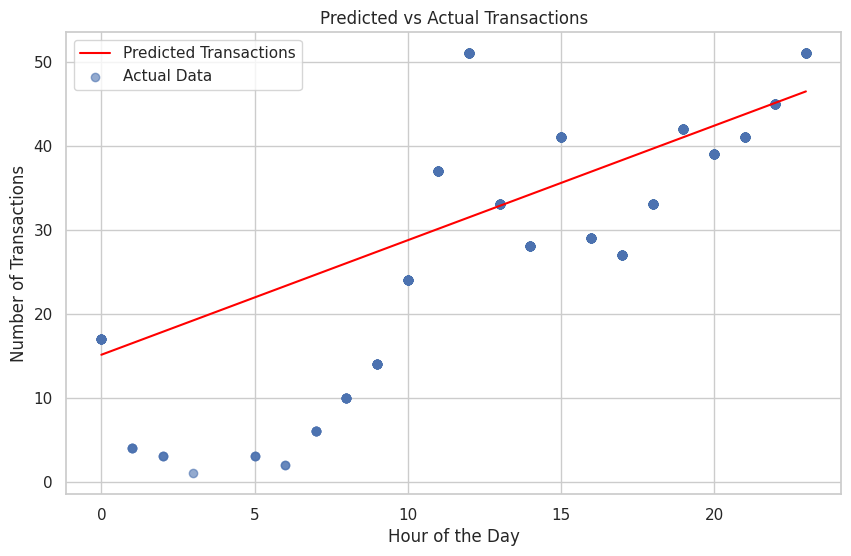

In [ ]:
#Step 9: Advanced Analytical Insights and Machine Learning Integration
#Step 9.1. Implement Predictive Modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = data[['Hour']]  # Features
y = data['Transaction Count']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict future trends
future_hours = [[hour] for hour in range(24)]
future_predictions = model.predict(future_hours)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(range(24), future_predictions, label='Predicted Transactions', color='red')
plt.scatter(X, y, label='Actual Data', alpha=0.6)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Predicted vs Actual Transactions')
plt.legend()
plt.show()


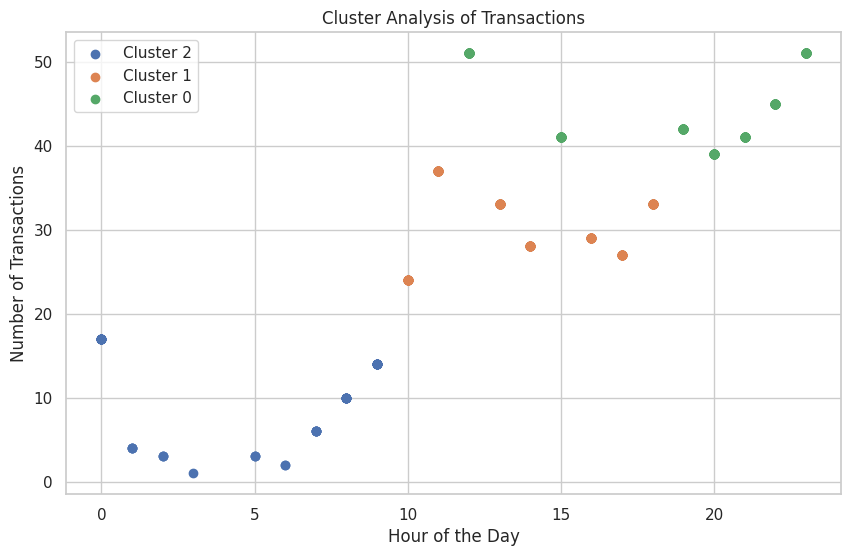

In [ ]:
#Step 9.2. Perform Clustering Analysis
from sklearn.cluster import KMeans

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Transaction Count']])

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Hour'], cluster_data['Transaction Count'], label=f'Cluster {cluster}')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Cluster Analysis of Transactions')
plt.legend()
plt.show()


In [ ]:
!pip install prophet



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjdh7hkqn/j_6as30x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjdh7hkqn/_lbx9xme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18236', 'data', 'file=/tmp/tmpjdh7hkqn/j_6as30x.json', 'init=/tmp/tmpjdh7hkqn/_lbx9xme.json', 'output', 'file=/tmp/tmpjdh7hkqn/prophet_modeli1no1lf8/prophet_model-20241225051324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:13:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:13:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

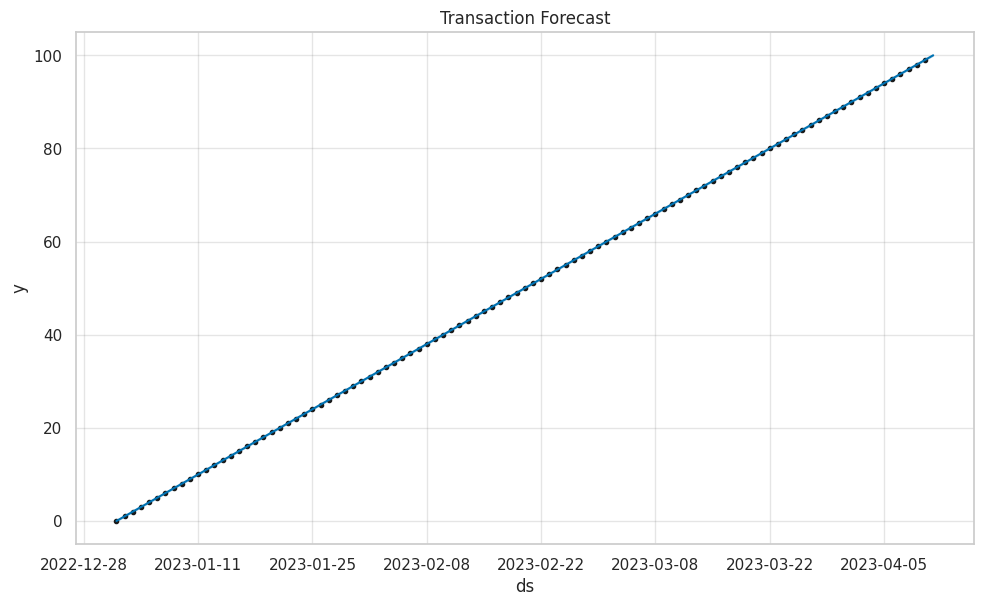

In [ ]:
#Step 9.3. Time Series Analysis
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Sample data (replace this with your actual dataset)
# Make sure that 'Transaction Date' is in datetime format and 'Transaction Count' is numeric
data = pd.DataFrame({
    'Transaction Date': pd.date_range('2023-01-01', periods=100, freq='D'),  # Replace with your data
    'Transaction Count': range(100)  # Replace with actual counts
})

# Prepare the data: Prophet requires columns 'ds' (date) and 'y' (value)
time_series_data = data[['Transaction Date', 'Transaction Count']].rename(columns={'Transaction Date': 'ds', 'Transaction Count': 'y'})

# Initialize the model
model = Prophet()

# Fit the model to the historical data
model.fit(time_series_data)

# Make future predictions (here predicting 24 hours ahead, for example)
future = model.make_future_dataframe(periods=24, freq='H') # Remove time_series_data from the function call

# Generate the forecast
forecast = model.predict(future)

# Visualize the forecast
model.plot(forecast)
plt.title('Transaction Forecast')
plt.show()


In [ ]:
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])


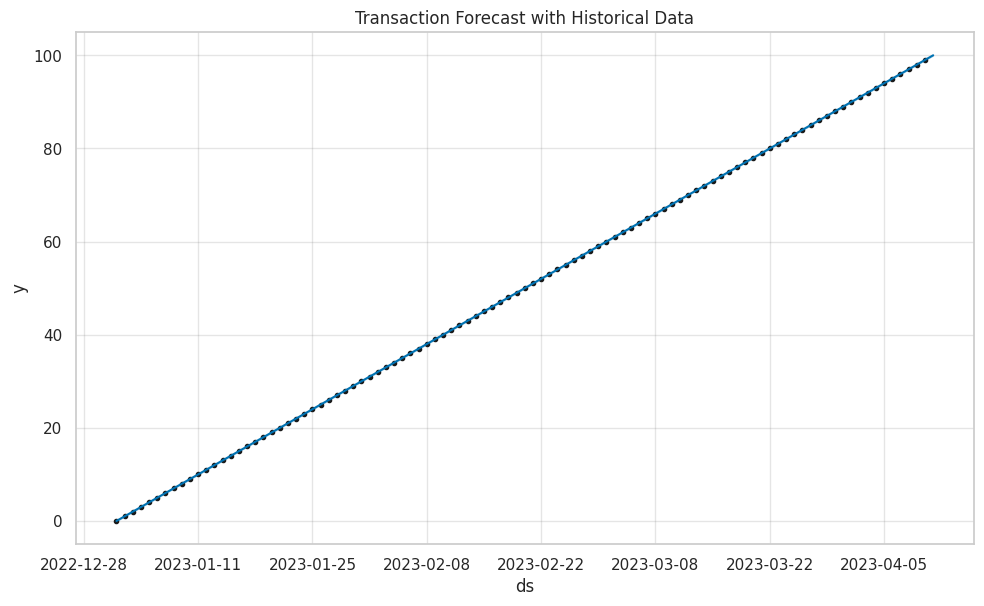

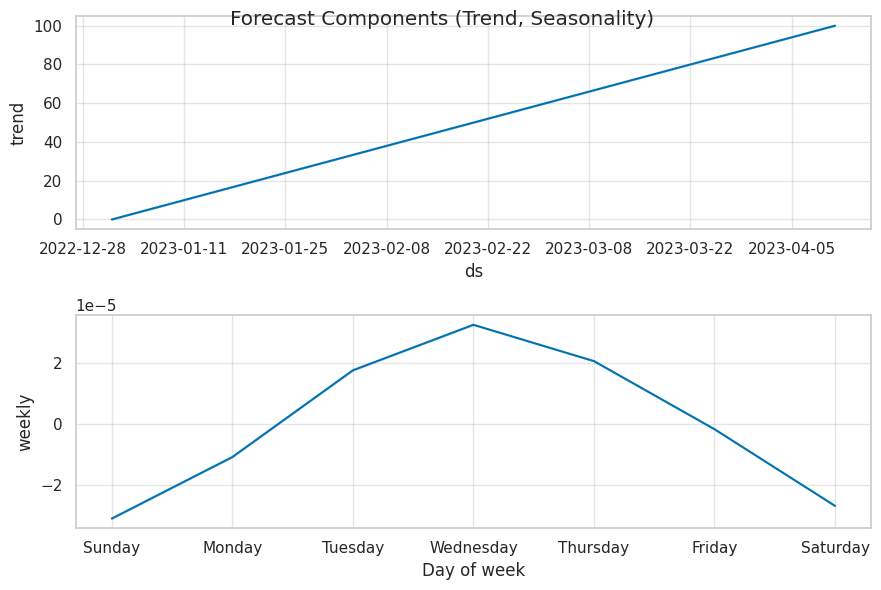

          ds      yhat  yhat_lower  yhat_upper
0 2023-01-01  0.000089   -0.000808    0.001035
1 2023-01-02  0.999997    0.999024    1.000954
2 2023-01-03  1.999914    1.998992    2.000868
3 2023-01-04  2.999817    2.998845    3.000803
4 2023-01-05  3.999959    3.999048    4.000904


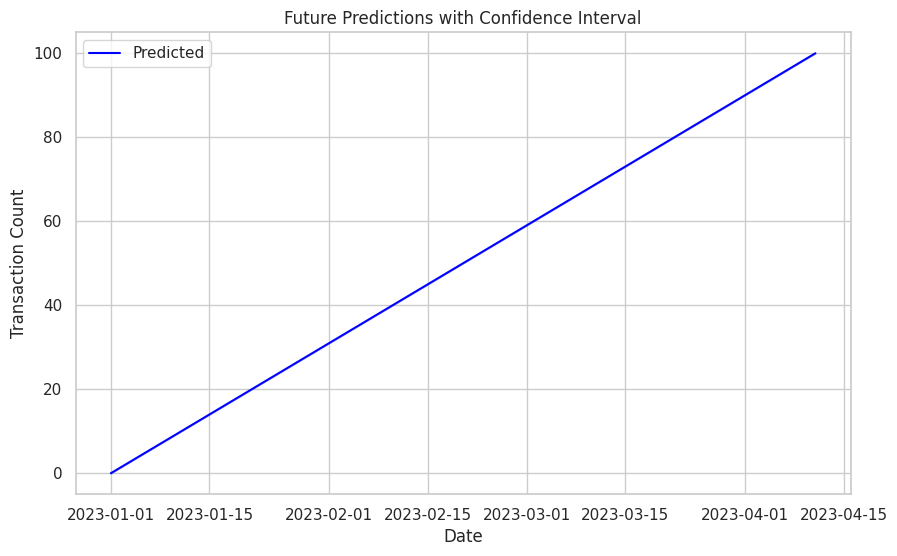

In [ ]:
#Step-9.4. Analyze Weekly or Seasonal Patterns
import matplotlib.pyplot as plt

# Visualize the forecast
fig1 = model.plot(forecast)
plt.title('Transaction Forecast with Historical Data')

# Display future predictions (for future periods)
fig2 = model.plot_components(forecast)
plt.suptitle('Forecast Components (Trend, Seasonality)')
plt.show()

# If you want to display future predictions in a table format
# You can look at 'yhat' and its confidence intervals (yhat_lower, yhat_upper)
future_predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(future_predictions.head())  # Displaying first few rows of the forecasted values

# Visualizing the future predictions as a line plot for better comparison
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)
plt.title('Future Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()


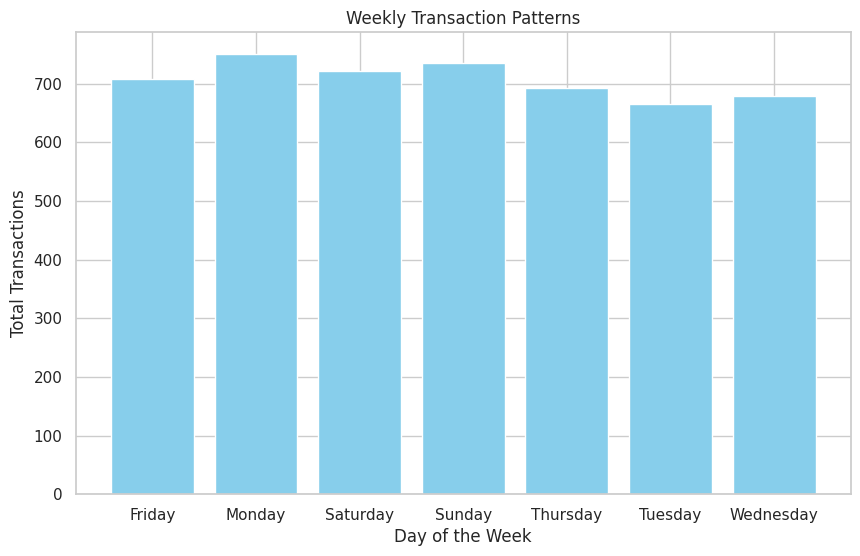

In [ ]:
#Step-9.5. Anomaly Detection
data['Day'] = pd.to_datetime(data['Transaction Date']).dt.day_name()
day_counts = data.groupby('Day')['Transaction Count'].sum()

# Plot weekly patterns
plt.figure(figsize=(10, 6))
plt.bar(day_counts.index, day_counts.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Transactions')
plt.title('Weekly Transaction Patterns')
plt.show()


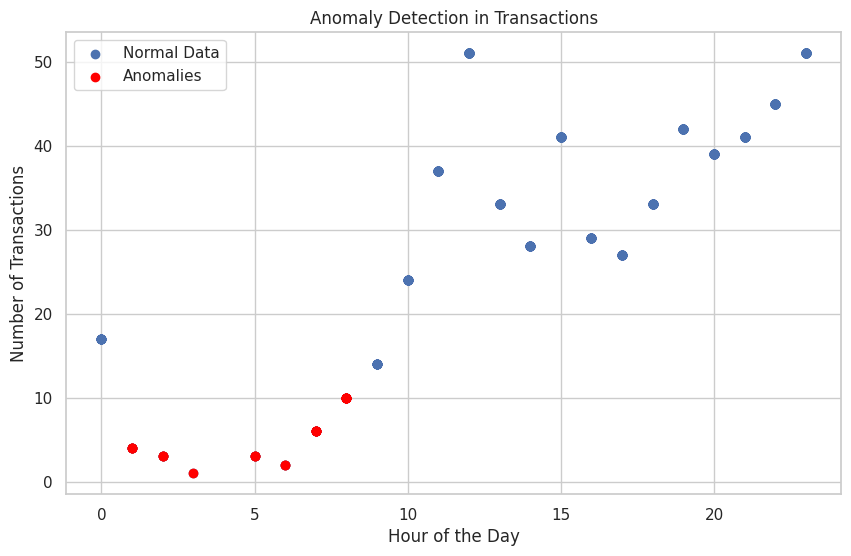

In [ ]:
#Step-9.6. Correlation Analysis
from sklearn.ensemble import IsolationForest
import pandas as pd

# Reload the original dataset
data = pd.read_csv('/content/Order_details(masked).csv')

# Convert 'Transaction Date' to datetime if needed
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Extract hour
data['Hour'] = data['Transaction Date'].dt.hour # Recreate 'Hour' column

# Calculate transaction count for each hour (same as before)
transaction_counts = data.groupby('Hour').size()
data['Transaction Count'] = data['Hour'].map(transaction_counts)

# Train the model
iso_forest = IsolationForest(contamination=0.05)
data['Anomaly'] = iso_forest.fit_predict(data[['Transaction Count']])

# Visualize anomalies
anomalies = data[data['Anomaly'] == -1]
plt.figure(figsize=(10, 6))
plt.scatter(data['Hour'], data['Transaction Count'], label='Normal Data')
plt.scatter(anomalies['Hour'], anomalies['Transaction Count'], color='red', label='Anomalies')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Anomaly Detection in Transactions')
plt.legend()
plt.show()


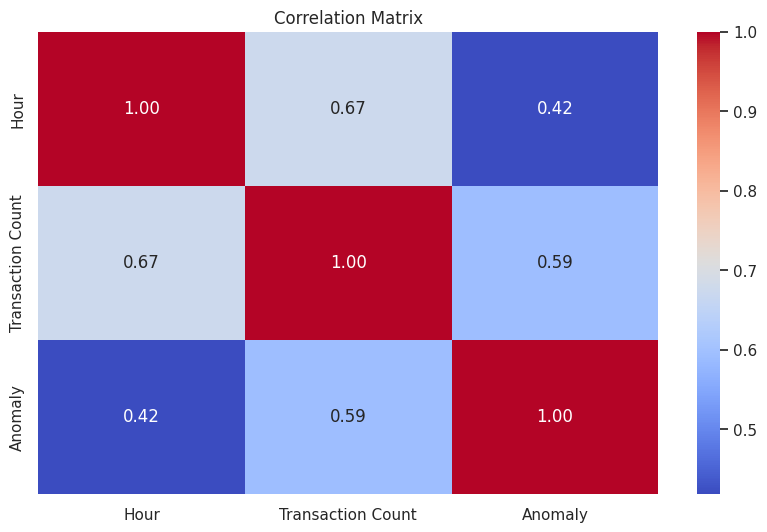

In [ ]:
#Step-9.6. Correlation Analysis
import seaborn as sns

# Compute correlation matrix for numeric columns only
corr_matrix = data.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Step-9.7. Build a Recommendation System
peak_hours = hours[:3]  # Top 3 busiest hours
print(f"Recommended Promotion Hours: {peak_hours}")


Recommended Promotion Hours: [0, 1, 2]


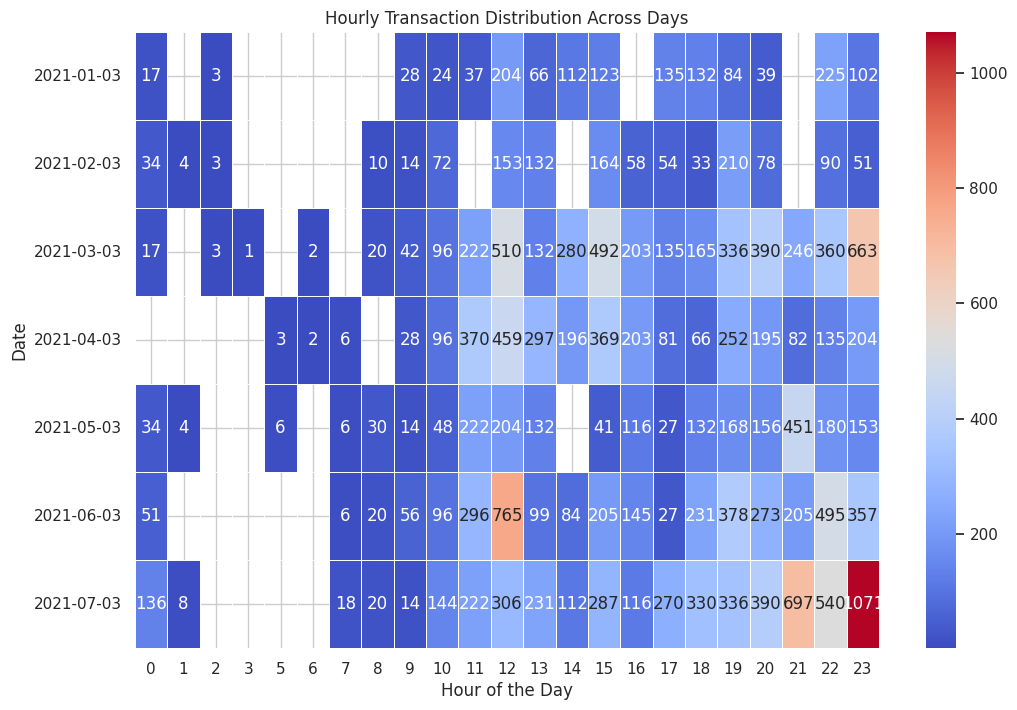

In [ ]:
#Step 10: Advanced Data Visualization and Analysis
#Step 10.1. Hourly Distribution of Transactions with Seaborn Heatmap

import seaborn as sns

# Extracting date and hour for visualization
data['Date'] = pd.to_datetime(data['Transaction Date']).dt.date
data['Hour'] = pd.to_datetime(data['Transaction Date']).dt.hour

# Create a pivot table for day vs hour
pivot_data = data.pivot_table(index='Date', columns='Hour', values='Transaction Count', aggfunc='sum')

# Create a heatmap to visualize hourly transaction patterns
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt='g', linewidths=0.5)
plt.title('Hourly Transaction Distribution Across Days')
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.show()


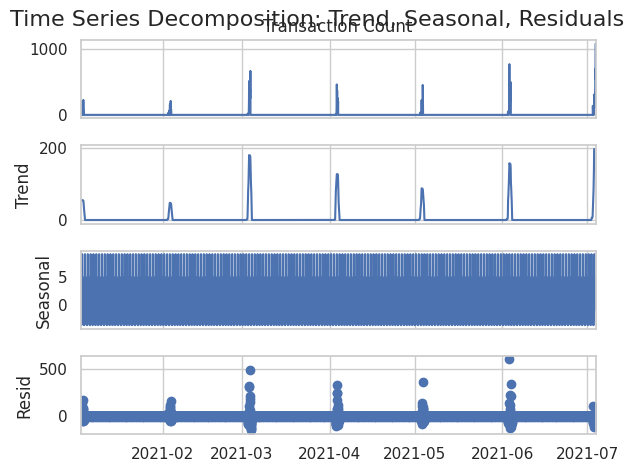

In [ ]:
#Step-10.2.Time Series Decomposition
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Reset the index to bring 'Transaction Date' back as a column if it's the index
if 'Transaction Date' in data.index.names:
    data = data.reset_index()

# Convert 'Transaction Date' to datetime (if it's not already)
if data['Transaction Date'].dtype != 'datetime64[ns]':
    data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Set 'Transaction Date' as the index
data.set_index('Transaction Date', inplace=True)

# Resample and sum transactions by hour, but only for the 'Transaction Count' column
hourly_data = data[['Transaction Count']].resample('h').sum() # Select only 'Transaction Count' for sum

# Decompose the time series (period=24 for daily seasonality)
decomposition = seasonal_decompose(hourly_data['Transaction Count'], model='additive', period=24) # Access the column

# Plot the decomposition results
decomposition.plot()
plt.suptitle('Time Series Decomposition: Trend, Seasonal, Residuals', fontsize=16)
plt.show()




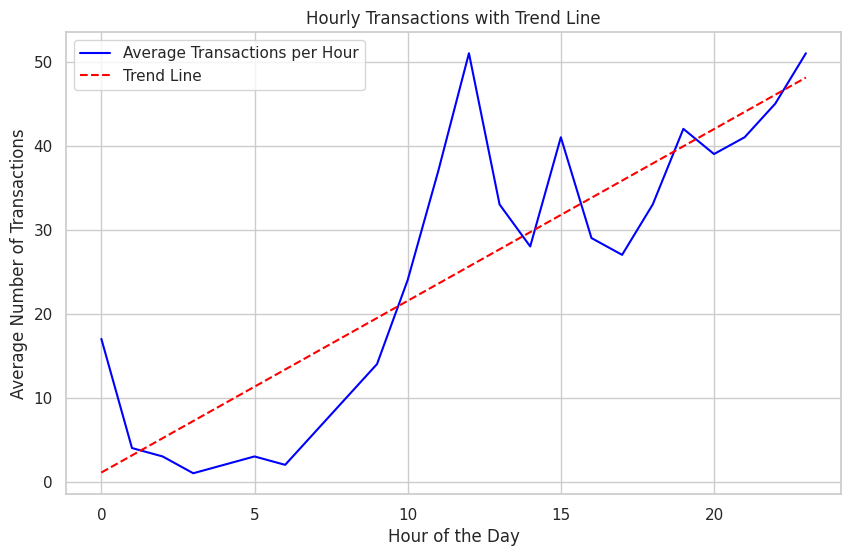

In [ ]:
#Step-10.3. Trend Line on Hourly Transaction Counts
from scipy import stats

# Group data by hour to calculate average transaction counts per hour
hourly_data = data.groupby('Hour')['Transaction Count'].mean()

# Fit a linear regression model to the hourly data
slope, intercept, r_value, p_value, std_err = stats.linregress(hourly_data.index, hourly_data.values)

# Create a line plot for the trend
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index, hourly_data.values, label='Average Transactions per Hour', color='blue')
plt.plot(hourly_data.index, slope * hourly_data.index + intercept, label='Trend Line', color='red', linestyle='--')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Transactions')
plt.title('Hourly Transactions with Trend Line')
plt.legend()
plt.show()


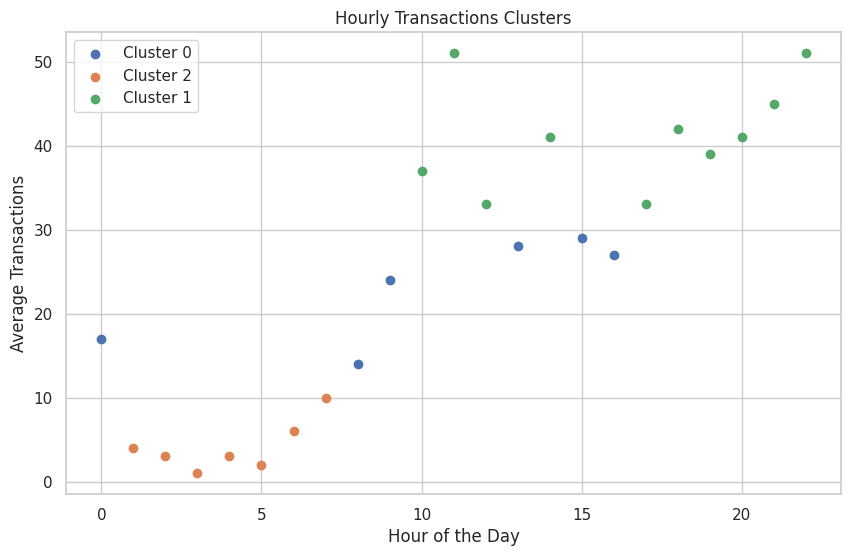

In [ ]:
#Step-10.4. Clustering to Identify Transaction Patterns (K-Means)
from sklearn.cluster import KMeans

# Grouping data by hour to get average transaction count
hourly_data = data.groupby('Hour')['Transaction Count'].mean().values.reshape(-1, 1)

# Fit KMeans clustering to the data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(hourly_data)

# Add clusters to the DataFrame
hourly_data = pd.DataFrame(hourly_data, columns=['Transaction Count'])
hourly_data['Cluster'] = clusters

# Plot clustered data
plt.figure(figsize=(10, 6))
for cluster in hourly_data['Cluster'].unique():
    cluster_data = hourly_data[hourly_data['Cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['Transaction Count'], label=f'Cluster {cluster}')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Transactions')
plt.title('Hourly Transactions Clusters')
plt.legend()
plt.show()


In [ ]:
#Step-10.5. Predictive Transaction Volume Using Linear Regression
from sklearn.linear_model import LinearRegression

# Prepare the data for regression
X = hourly_data.index.values.reshape(-1, 1)  # Hours
y = hourly_data['Transaction Count'].values  # Transaction counts

# Create and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predict for a future hour (example: 8 AM)
future_hour = [[8]]  # Example hour for prediction
predicted_transactions = model.predict(future_hour)

print(f"Predicted Transactions for 8 AM: {predicted_transactions[0]:.2f}")


Predicted Transactions for 8 AM: 18.87


In [ ]:
#Step-10.6. Advanced Visualization: Interactive Plot with Plotly
import plotly.express as px

# Create an interactive line plot
fig = px.line(hourly_data, x=hourly_data.index, y='Transaction Count', title='Interactive Hourly Transaction Data')
fig.update_layout(xaxis_title='Hour of the Day', yaxis_title='Transaction Count')
fig.show()


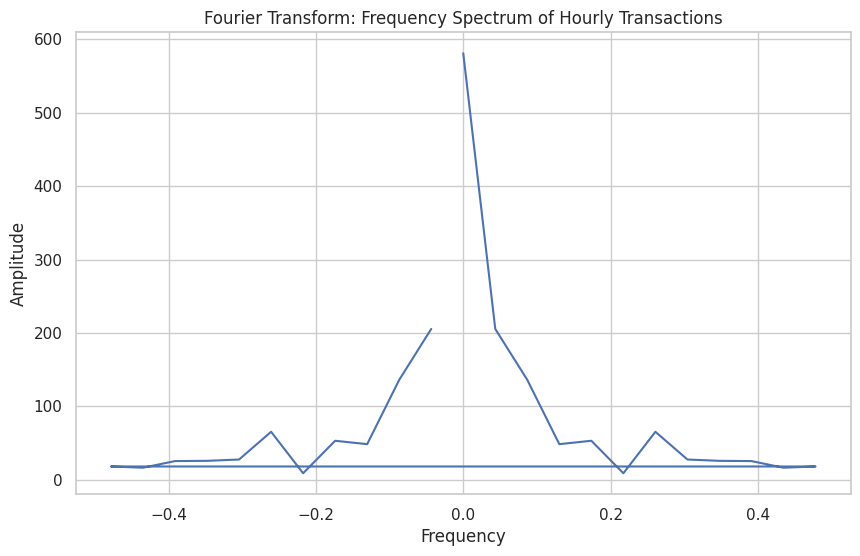

In [ ]:
#Step-10.7. Seasonal Analysis with Fourier Transform
import numpy as np

# Perform Fourier Transform on the hourly data
hourly_data_fft = np.fft.fft(hourly_data['Transaction Count'])
frequencies = np.fft.fftfreq(len(hourly_data))

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(hourly_data_fft))
plt.title('Fourier Transform: Frequency Spectrum of Hourly Transactions')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


<ipython-input-6-23f807ad9cad>:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_transactions = data.resample('H')['Transaction Count'].sum()


ADF Statistic: -3.394358973303952
p-value: 0.011152683567571922


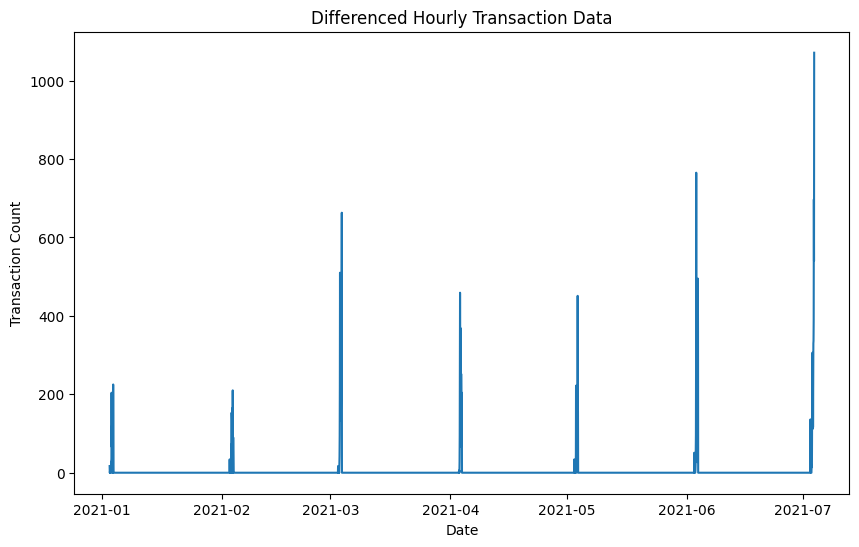

<ipython-input-6-23f807ad9cad>:60: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(hourly_transactions.index[-1], periods=25, freq='H')[1:], forecast, label='Forecast', color='red')


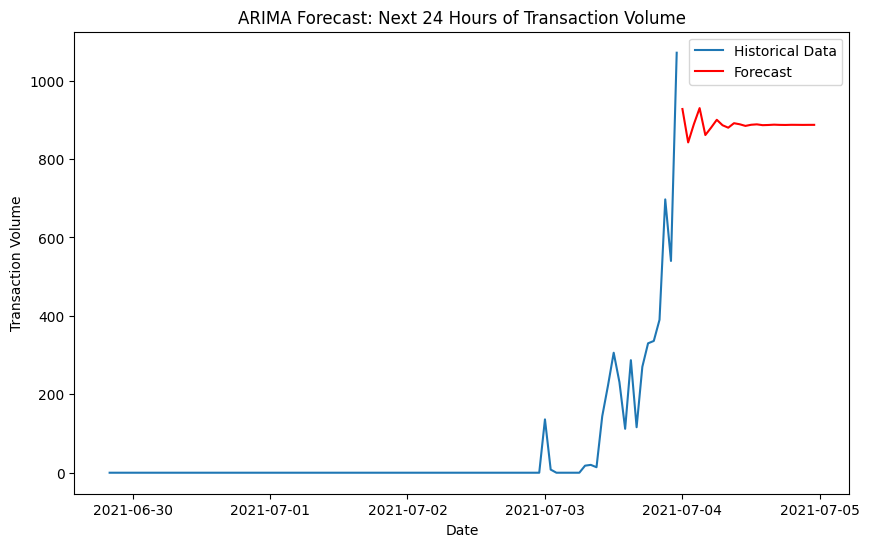

<ipython-input-6-23f807ad9cad>:68: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_df = pd.DataFrame({'Forecasted Transaction Volume': forecast}, index=pd.date_range(hourly_transactions.index[-1], periods=25, freq='H')[1:])


In [ ]:
#Step 11: Future Predictions and Analysis
#Step-11.1. Time Series Forecasting with ARIMA
# Install necessary library for ARIMA
!pip install statsmodels

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

# Loading data
data = pd.read_csv('/content/Order_details(masked).csv')

# Preprocessing data
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])
data.set_index('Transaction Date', inplace=True)

# Extract hour from the 'Transaction Date'
data['Hour'] = data.index.hour # extract the hour from the DatetimeIndex

# Calculate the frequency of transactions for each hour (create 'Transaction Count')
transaction_counts = data.groupby('Hour').size()
data['Transaction Count'] = data['Hour'].map(transaction_counts) # map the counts to the 'Hour' column

# Resample data to hourly transaction volume (aggregating by hour)
hourly_transactions = data.resample('H')['Transaction Count'].sum()

# Check for stationarity using ADF test
result = adfuller(hourly_transactions.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value is high, we can apply differencing to make the data stationary
if result[1] > 0.05:
    hourly_transactions_diff = hourly_transactions.diff().dropna()
else:
    hourly_transactions_diff = hourly_transactions

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(hourly_transactions_diff)
plt.title('Differenced Hourly Transaction Data')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

# Fit the ARIMA model (parameters can be adjusted)
model = ARIMA(hourly_transactions, order=(5, 1, 0))  # ARIMA(p,d,q) with p=5, d=1, q=0
model_fit = model.fit()

# Forecast the next 24 hours (1 day)
forecast = model_fit.forecast(steps=24)

# Plot the forecasted results
plt.figure(figsize=(10, 6))
plt.plot(hourly_transactions.index[-100:], hourly_transactions.values[-100:], label='Historical Data')
plt.plot(pd.date_range(hourly_transactions.index[-1], periods=25, freq='H')[1:], forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast: Next 24 Hours of Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Transaction Volume')
plt.legend()
plt.show()

# Save the forecast results for business analysis
forecast_df = pd.DataFrame({'Forecasted Transaction Volume': forecast}, index=pd.date_range(hourly_transactions.index[-1], periods=25, freq='H')[1:])
forecast_df.to_csv('/content/forecasted_transaction_volume.csv')  # Save the result as a CSV file


